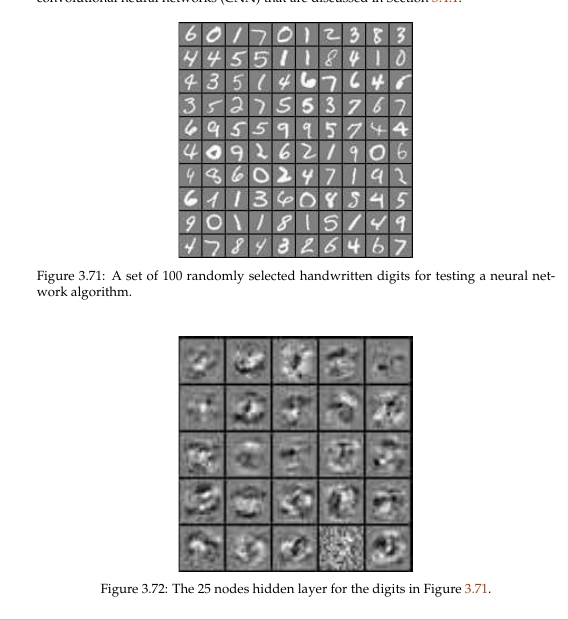

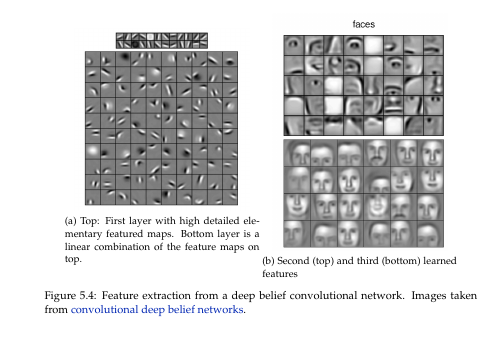

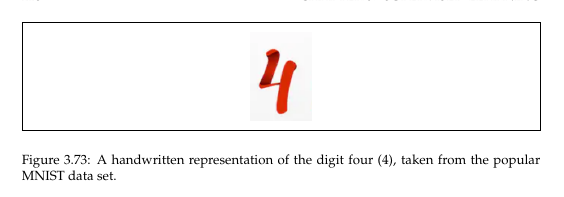

Dos pilares importantes:
* Funcion de costo
* Gradiente de la funcion de costo
Con estas dos se hace el entrenamiento, que consiste en hallar los $\theta$s.
$$ \theta^{(k)} = \theta^{(k-1)} - \alpha \nabla_{\theta} J(\theta)$$

## Funcion de costo:
Recordando la logistica:

$$ J(\theta) =-\frac1m \sum_{i=1}^m y_i \log[h(\theta, x^{(i)})] + (1 - y_i) \log [1 - h(\theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Queremos implementar un algoritmo que detecte un grupo de imagenes de $K$ clases (por ejemplo los digitos del 0 al 9). 

La funcion de costo para esto cambia:
$$ J(\theta) =-\frac1m \sum_{k=1}^K \sum_{i=1}^m y_i^{(k)} \log[h_k(\theta, x^{(i)})] + (1 - y_i^{(k)}) \log [1 - h(\theta, x^{(i)})] + \frac{\lambda}{2m}  \sum_{l=1}^L \sum_{i=1}^{n_l} \sum_{j=1}^{n_{l+1}} ( \Theta_{ij}^{(l)})^2$$


## BackPropagation: Hallar el gradiente.
Aca esta la magia de ANN. 

Inicialmente se hace propagacion hacia adelante con unos $\theta$s aleatorios (random) y pequenos.


Asumimos $L+1$ capas. De las cuales hay 
$L-1$ ocultas, una de entrada y una de salida

Para la funcion de activacion usamos la logistica
$S(t)=1/(1 + \exp(-t))$
En este proceso tenemos los siguientes valores:

Los pasos de propagacion hacia adelante son:

\begin{eqnarray}
A^{(1)} &=& X \\
A^{(2)} &=& S(Z^{(2)}) = S( X \Theta^{(1)})  \\
A^{(3)} &=& S(Z^{(3)}) = S (A^{(2)} \Theta^{(2)}) \\
&\vdots & \\
A^{(L-1)} &=& S(Z^{(L-1)}) = S(A^{(L-2)} \Theta^{(L-2)})  \\
A^{(L)} &=& A^{(L)} = S(Z^{(L)}) = S(A^{(L-1)} \Theta^{(L-1)} \\
A^{(L+1)} &=& h(\Theta, X) = A^{(L+1)} = S(Z^{(L+1)}) = S(A^{(L)} \Theta^{(L)}) 
\end{eqnarray}

La hipotesis es una funcion de dos indices y la escribimos como

$$h_{ij} (\Theta , X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} 
    \right ) = S_{ij} = A_{ij}^{L+1}  \quad i=1,2, \cdots, K$$

Comencemos con escribir la funcion de costo sin regularizacion.


$$ J(\theta) =-\frac1m \sum_{i} \sum_{j} y_{ij} \log[h_{ij}(\theta, x^{(i)})] + (1 - y_{ij}) \log [1 - h_{ij}(\theta, x^{(i)})] $$





Necesitamos calcular el gradiente que son derivadas parciales.

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}}  &=& -\frac1m \sum_i \sum_j y_{ij} \frac{S_{ij}(1 - S_{ij})}{S_{ij}} \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj}  + \frac1m \sum_i \sum_j (1 - y_{iq})  \frac{S_{ij}(1-S_{ij})}{1 - S_{ij}} \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \\
&=& \frac1m \sum_i -y_{iq} (1 - S_{ij}) A_{ip}^{(L)} + (1- y_{iq}) S_{iq} A_{ip}^{(L)} \\
&=& \frac1m \sum_i -y_{iq} A_{ip}^{(L)} + y_{qj} S_{ij} A_{ip}^{(L)} + S_{iq} A_{ip}^{(L)} - y_{iq} S_{iq} A_{ip}^{(L)} \\
&=& \frac1m \sum_i  (S_{iq} - y_{iq} ) A_{ip}^{(L)} \\
&=&  \frac1m \sum_i ( A_{iq}^{(L+1)} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m (A^{(L)})^T_p  ( A^{(L+1)} -Y)_q
\end{eqnarray}

En resumen:

$$ \frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}}  = \frac1m (A^{(L)})^T_p  ( A^{(L+1)} -Y)_q $$

Ahora necesitamos calcular la derivada con respect a $\Theta_{pq}^{(L-1)}$.

Recuerde:

\begin{eqnarray}
h_{ij}(\Theta , X) &=& S \left (  \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right ) = A_{ij}^{(L+1)} \\
A_{ik}^{(L)} &=& S(Z_{ik}^{(L)}) = S \left ( \sum_r A_{ir}^{(L-1)} \Theta_{rk}^{(L-1)}
    \right )
\end{eqnarray}

Calculamos la derivada. 


\begin{eqnarray}
\frac{\partial ( \log h_{ij}(\Theta , X))}{\partial \Theta_{pq}^{(L-1)}} &=& \frac{S_{ij}(1-S_{ij}) }{S_{ij}} \sum_k  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{(L+1)}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \quad \quad (1) 
\end{eqnarray}
Debemos encontrar $$\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} $$

$$\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} = S_{ik} (1 - S_{ik}) \sum_r A_{ir}^{(L-1)} \delta_{rp} \delta_{kq} = A_{ik}^{(L)} (1 - A_{ik}^{(L)}) A_{ip}^{(L-1)}   \delta_{kq} $$
Metemos esto en la ecuacion (1) y obtenemos:

$$\frac{\partial ( \log h_{ij}(\Theta , X))}{\partial \Theta_{pq}^{(L-1)}} = (1 - A_{ij}^{(L+1)}) \sum_k A_{ik}^{(L)} (1 - A_{ik}^{(L)})  \delta_{kq}\Theta_{kj}^{(L)} = (1 - A_{ij}^{(L+1)})  A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)}  \Theta_{qj}^{(L)}$$

De forma que

\begin{eqnarray}
\frac{\partial \log ( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} = (1 - A_{ij})^{(L+1)} ( A_{iq}^{(L)} (1 - A_{iq})^{(L)} A_{ip}^{(L-1)} \Theta_{qj}^{(L)} )
\end{eqnarray}



De igual forma

\begin{eqnarray}
\frac{\partial \log (1 - h_{ij}(\Theta , X))}{\partial \Theta_{pq}^{(L-1)}} &=& -\frac{S_{ij}(1-S_{ij})}{1 - S_{ij}} \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=&-A_{ij}^{(L-1)} \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& - A_{ij}^{(L-1)} \left (
  A_{iq}^{(L)} (1 - A_{iq})^{(L)} A_{ip}^{(L-1)} \Theta_{qj}^{(L)}   \right ) 
\end{eqnarray}

\begin{eqnarray}
y_{ij} \frac{\partial ( \log h_{ij}(\Theta , X))}{\partial \Theta_{pq}^{(L-1)}}  + (1 - y_{ij})\frac{\partial \log (1 - h_{ij}(\Theta , X))}{\partial \Theta_{pq}^{(L-1)}}  = \\
y_{ij} (1 - A_{ij})^{(L+1)} ( A_{iq}^{(L)} (1 - A_{iq})^{(L)} A_{ip}^{(L-1)} \Theta_{qj}^{(L)} ) + (1 -y_{ij}) (- A_{ij}^{(L-1)} \left (
  A_{iq}^{(L)} (1 - A_{iq})^{(L)} A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \right )  \\
  =(A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}) [ y_{ij}(1 - A_{ij})^{(L+1)} - (1- y_{ij}) A_{ij}^{(L+1)}] \\
=(  y_{ij} - A_{ij}^{(L+1}) ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} A_{ip}^{(L-1)} \Theta_{qj}^{(L)})
\end{eqnarray}

\begin{eqnarray}
\frac{∂ J(\Theta , X)}{\partial \Theta_{pq}^{(L-1)}}
&=& \frac1m \sum_i \sum_j (A_{ij}^{(L+1)} - y_{ij}) ( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}) \\
&=& \frac1m \sum_i ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} A_{ip}^{(L-1)}) \sum_j (A_{ij}^{(L+1)} - y_{ij}) \Theta_{qj}^{(L)} \\
&=&\frac1m \sum_i  ( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)}) [ A^{(L+1)} - Y) (\Theta^{(L)})^T]_{iq} \\
&=& \frac1m \sum_i A_{ip}^{(L-1)}[ A^{(L+1)} - Y) (\Theta^{(L)})^T]_{iq} A_{iq}^{(L)} (1 - A_{iq})^L \\
&=& \frac1m \sum_i A_{ip}^{(L-1)}[ A^{(L+1)} - Y) (\Theta^{(L)})^T]_{iq} [ A^{(L)} \circ (1 - A^{(L)})]_{iq}  \\
&=& \frac1m [ (A^{(L-1)})^T]_p [ (A^{(L+1)} - Y) (\Theta^{(L)})^T A^{(L)} \circ (1 - A^{(L)}]_q
\end{eqnarray}

\begin{eqnarray}
\frac{∂ J(\Theta , X)}{\partial \Theta_{pq}^{(L-1)}}
&=& \frac1m [ (A^{(L-1)})^T]_p [ (A^{(L+1)} - Y) (\Theta^{(L)})^T A^{(L)} \circ (1 - A^{(L)}]_q
\end{eqnarray}

Hay un patron. Tome un indice $I$ en vez de $L-1$, 
En la prueba anterior:

\begin{eqnarray}
I  ↔ L-1 \\
I+1 ↔ L \\
I+2 ↔ L+1
\end{eqnarray}

\begin{eqnarray}
\frac{∂ J(\Theta , X)}{\partial \Theta_{pq}^{(I)}}
&=& \frac1m [ (A^{(I)})^T]_p [ (A^{(I+2)} - Y) (\Theta^{(I+1)})^T A^{(I+1)} \circ (1 - A^{(I+1)}]_q  \quad , \quad I=L-1, L-2, \cdots , 1
\end{eqnarray}

Esto concluye la propagacion hacia atras (gradiente con respecto a **TODOS** los $\theta$s.) Falta el termino de regularizacion.

$$ R(\Theta) = \frac{\lambda}{2m}  \sum_{l=1}^L \sum_{i=1}^{n_l} \sum_{j=1}^{n_{l+1}} ( \Theta_{ij}^{(l)})^2$$

\begin{eqnarray}
\frac{\partial R(\Theta)}{\partial \Theta_{pq}^{\ell}}= \frac{\lambda}{m} \sum_l \sum_i \sum_j \Theta_{ij}^{(l)} \frac{\partial \Theta_{ij}^{(l)}}{\partial \Theta_{pq}^{(\ell)}} = \frac{\lambda}{m} \sum_l \sum_i \sum_j \delta_{l \ell} \delta_{ip} \delta_{jq} \Theta_{ij}^{\ell} = \frac{\lambda}{m} \Theta_{pq}^{(\ell)} 
\end{eqnarray}

Ya listos para el algoritm.












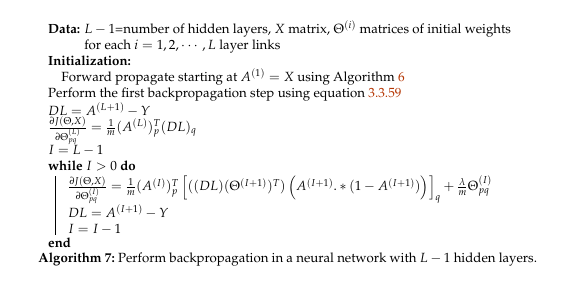

# Diagnosticos de ML y seleccion de modelos

Para generar un proceso de ML podemos usar tres conjuntos de datos

* Los datos de entrenamiento (60%)
* Los datos de validacion (20%)
* Los datos de prueba (20%)

Un ejemplo.

Piense en las siguientes 6 hipotesis sobre un modelo.

\begin{eqnarray}
h_1(\theta, x) &=& \theta_0 + \theta_1 x \\
h_2(\theta, x) &=& \theta_0 + \theta_1 x + \theta_2 x^2 \\
&\vdots & \\
h_6(\theta, x) &=& \theta_0 + \theta_1 x + \cdots \theta_6 x^6
\end{eqnarray}

Divide los datos como se indico arriba y va a generar funciones objetivo. (cv=cross-validation)


\begin{eqnarray}
J_{\text{train}} &=& \frac{1}{2 m_{\text{train}}} \left [
    \sum_{i=1}^{m_{\text{train}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{train}}} \theta_i^2 
    \right ] \\
J_{\text{cv}} &=& \frac{1}{2 m_{\text{cv}}} \left [
    \sum_{i=1}^{m_{\text{cv}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{cv}}} \theta_i^2 
    \right ] \\
    J_{\text{test}} &=& \frac{1}{2 m_{\text{test}}} \left [
    \sum_{i=1}^{m_{\text{test}}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{test}}} \theta_i^2 
    \right ] \\
\end{eqnarray}



Otro analisis, tal vez mas comun es $k-fold$ crossvalidation.
Se parten los datos en $k$ conjuntos. Se separa uno para validar
y los otros $k-1$ para entrenar. A lo ultimo se promedian los errores. Con esto simplemente se prueba la efectividad del algortimo (por ejemplo regresion vs neural networks).

In [3]:
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# load data from 
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

KeyboardInterrupt: ignored

In [ ]:
X_train.shape

(49000, 784)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

KeyError: ignored

In [ ]:
X_train.shape

(49000, 784)

In [ ]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
42054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Bias Versus Variance


* **Bias:** Es el error que ocurre en promedio. 
* **Variance** Es el error causado por tratar de ajustar los datos muy bien en el entrenamiento. Esto hace que se pueden dejar influenciar por el ruido. La variacion del modelo. Si es muy alta podria indicar overfitting.

* **Noise:** Ruido.

Queremos separar el error en estas partes.

Pensemos en el la funcion de costo

$$ J(\theta) = \frac{1}{2m} ( \sum_{i=1}^m ( h(\theta, x^{(i)}) - y^{(i)} )^2 + \lambda \sum_{i=1}^n \theta_i^2
) $$

MSE: Mean Square error. 

El valor esperado del error.

$$ E[(y- h(x))^2] = \sum_{i=1}^m (y_i - h(x_i))^2 p(x_i) $$
Ahora, si la distribucion es uniforme $p(x_i)=1/m$ y

$$MSE = E[(y- h(x))^2] = \frac1m \sum_{i=1}^m (y_i - h(x_i))^2 $$

Debemos pensar en un modelo.

$$ y= f(x) + \epsilon$$
donde $\epsilon$ es el ruido, normal con $\mu, \sigma$. 

\begin{eqnarray}
\text{Bias} [ h(x)] = E[h(x)] - E[f(x)] \\
\mathbb{V}[h(x)] = E[h^2(x)] - E^2[h(x)]
\end{eqnarray}